In [1]:
import warnings
warnings.filterwarnings("ignore")
# tabular data stuff: numpy and pandas
import numpy as np
import pandas as pd
# data viz:
import matplotlib.pyplot as plt
import seaborn as sns

import env


In [2]:
sql='''
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017
WHERE propertylandusetypeid=261

'''

### Exercises II
### Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

### In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

### 3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [3]:
database_url_base = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/zillow'

In [4]:
#acquire dataframe
df = pd.read_sql(sql, database_url_base)
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [54]:
#show info with counts
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype
---  ------                        --------------    -----
 0   bedroomcnt                    2140235 non-null  int64
 1   bathroomcnt                   2140235 non-null  int64
 2   calculatedfinishedsquarefeet  2140235 non-null  int64
 3   taxvaluedollarcnt             2140235 non-null  int64
 4   yearbuilt                     2140235 non-null  int64
 5   taxamount                     2140235 non-null  int64
 6   fips                          2140235 non-null  int64
dtypes: int64(7)
memory usage: 195.1 MB


In [55]:
#look at dataframe
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,3633,3633,296425,2005,6941,6037
6,3,1620,1620,847770,2011,10244,6037
7,3,2077,2077,646760,1926,7924,6037
11,0,1200,1200,5328,1972,91,6037
14,0,171,171,6920,1973,255,6037


In [56]:
#renaming columns
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})

In [58]:
# 14981645 rows and 7 columns coming in.

df.size, df.shape

(14981645, (2140235, 7))

In [59]:
#display numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2140235.0,3.301419,0.932600,0.0,3.0,3.0,4.0,25.0
bathrooms,2140235.0,1863.193970,1221.754161,1.0,1258.0,1623.0,2208.0,952576.0
area,2140235.0,1863.193970,1221.754161,1.0,1258.0,1623.0,2208.0,952576.0
tax_value,2140235.0,460641.625164,677157.635675,22.0,189166.0,328296.0,534606.0,90188462.0
year_built,2140235.0,1960.967545,22.150563,1801.0,1949.0,1958.0,1976.0,2016.0
taxamount,2140235.0,5616.218147,7814.562814,6.0,2540.0,4111.0,6411.0,1078101.0
fips,2140235.0,6048.309556,20.344910,6037.0,6037.0,6037.0,6059.0,6111.0


In [60]:
#run info to see numeric dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype
---  ------      -----
 0   bedrooms    int64
 1   bathrooms   int64
 2   area        int64
 3   tax_value   int64
 4   year_built  int64
 5   taxamount   int64
 6   fips        int64
dtypes: int64(7)
memory usage: 195.1 MB


### Prepare data

In [61]:
#prepare the data check sum of null values
df.isna().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [62]:
#takeaways
#large number of outliers in some columns
#real estate data may be heavily skewed


In [63]:
# Check for any Null values in each column of our DataFrame.
df.isna().any()

bedrooms      False
bathrooms     False
area          False
tax_value     False
year_built    False
taxamount     False
fips          False
dtype: bool

In [64]:
# find null percentage 
df.isna().mean().mul(100)

bedrooms      0.0
bathrooms     0.0
area          0.0
tax_value     0.0
year_built    0.0
taxamount     0.0
fips          0.0
dtype: float64

In [65]:
#drop all the null and assign 
df=df.dropna()

### Finding odd values

In [66]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   bedrooms    2140235 non-null  int64
 1   bathrooms   2140235 non-null  int64
 2   area        2140235 non-null  int64
 3   tax_value   2140235 non-null  int64
 4   year_built  2140235 non-null  int64
 5   taxamount   2140235 non-null  int64
 6   fips        2140235 non-null  int64
dtypes: int64(7)
memory usage: 195.1 MB


In [68]:
#check bedroom count
df.bedrooms.value_counts()

3     962944
4     633608
2     334221
5     150671
6      25117
1      22895
7       4792
0       4397
8       1103
9        290
10       118
11        34
13        15
12        12
14         7
15         5
18         3
16         2
25         1
Name: bedrooms, dtype: int64

In [18]:
#check bathroom count
df.bathroomcnt.value_counts()

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64

In [71]:
#check area count
df.area.value_counts()

1200     5184
1080     4376
1120     4354
1400     3828
1440     3684
         ... 
10180       1
13169       1
9095        1
10525       1
24920       1
Name: area, Length: 10557, dtype: int64

In [115]:
#check continuos data
df.taxamount.value_counts()

3032    417
3038    409
3034    409
3163    406
2950    405
       ... 
18        1
115       1
91        1
83        1
25        1
Name: taxamount, Length: 10322, dtype: int64

In [116]:
#get fips value count
df.fips.value_counts()

6037    1240933
6059     467594
6111     145167
Name: fips, dtype: int64

### Convert data types

In [72]:
#check for data loss
df.year_built.mean()/df.year_built.astype("int64").mean()

1.0

In [ ]:
#convert float to int
df.bedrooms = df.bedrooms.astype("int64")

In [73]:
#no data loss, convert to int
df.year_built = df.year_built.astype("int64")

In [76]:
# convert fips into int 
df.fips = df.fips.astype("int64")

In [77]:
#convert bathrooms into int
df.bathrooms = df.bathrooms.astype("int64")

In [78]:
#convert calculatedfinishedsquarefeet into int
df.area = df.area.astype("int64")

In [79]:
# convert tax_value into int 
df.tax_value = df.tax_value.astype("int64")

In [81]:
# convert taxamount into int 
df.taxamount = df.taxamount.astype("int64")

In [82]:
#how did casting work?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype
---  ------      -----
 0   bedrooms    int64
 1   bathrooms   int64
 2   area        int64
 3   tax_value   int64
 4   year_built  int64
 5   taxamount   int64
 6   fips        int64
dtypes: int64(7)
memory usage: 195.1 MB


### Visualize distributions & outliers

#### histplots

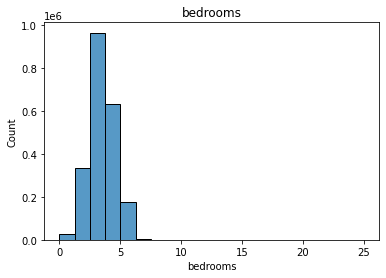

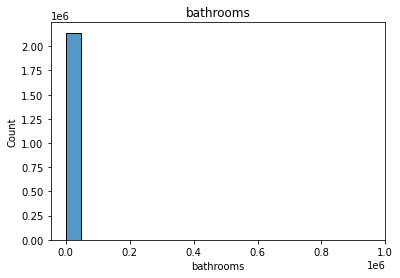

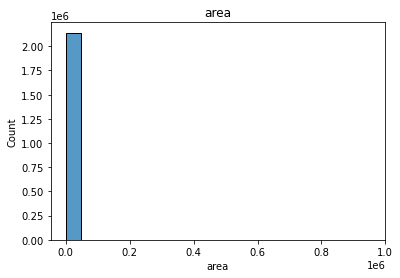

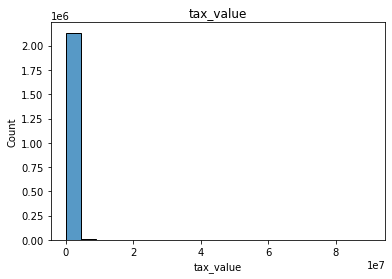

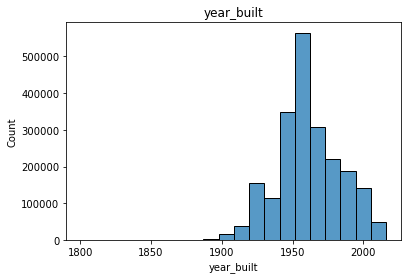

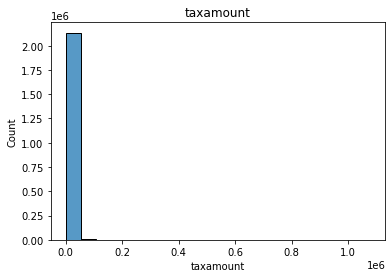

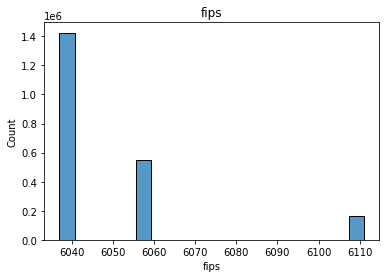

In [83]:
#plot histoplot to see distribution of data
for i in df.columns:
    sns.histplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

#### boxplots

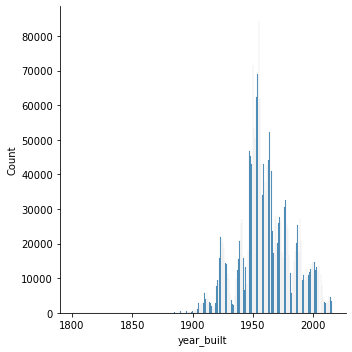

In [84]:

sns.displot(x='year_built', data=df)

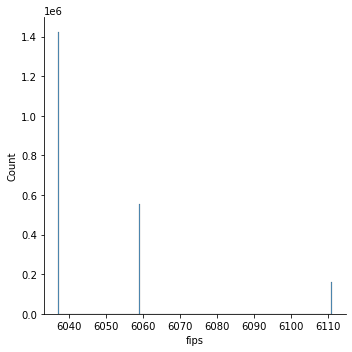

In [53]:

sns.displot(x='fips', data=df)

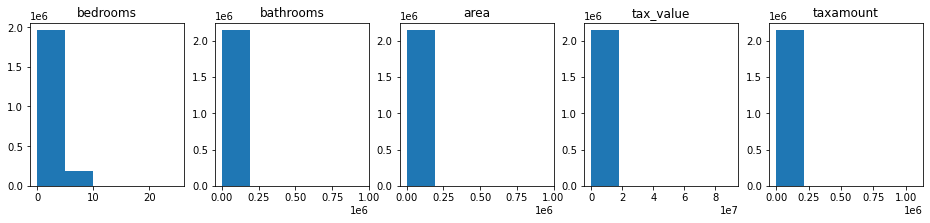

In [88]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

In [ ]:
#takeaways
# outliers must exist in each column for x axis to have the range shown
# tax value is looking like it has severe skew

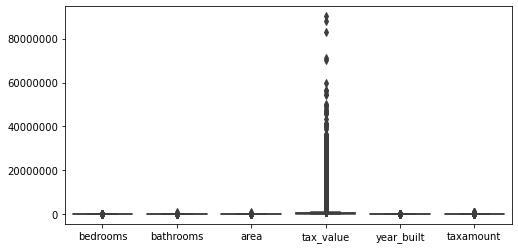

In [90]:
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips']))

plt.show()


In [91]:
#takeaways
#outliers are black diamonds

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2140235.0,3.301419,0.932600,0.0,3.0,3.0,4.0,25.0
bathrooms,2140235.0,1863.193970,1221.754161,1.0,1258.0,1623.0,2208.0,952576.0
area,2140235.0,1863.193970,1221.754161,1.0,1258.0,1623.0,2208.0,952576.0
tax_value,2140235.0,460641.625164,677157.635675,22.0,189166.0,328296.0,534606.0,90188462.0
year_built,2140235.0,1960.967545,22.150563,1801.0,1949.0,1958.0,1976.0,2016.0
taxamount,2140235.0,5616.218147,7814.562814,6.0,2540.0,4111.0,6411.0,1078101.0
fips,2140235.0,6048.309556,20.344910,6037.0,6037.0,6037.0,6059.0,6111.0


In [ ]:
#takeaways
#should drop outliers that still exist

In [94]:
#functions to remove outliers
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [96]:
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
df

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
6,3,1620,1620,847770,2011,10244,6037
7,3,2077,2077,646760,1926,7924,6037
18,3,1244,1244,169471,1950,2532,6037
19,3,1300,1300,233266,1950,3110,6037
20,3,1222,1222,290492,1951,3870,6037
...,...,...,...,...,...,...,...
2152853,4,1987,1987,259913,1955,3175,6059
2152855,3,1809,1809,405547,2012,4181,6059
2152859,4,3127,3127,536061,2014,6244,6059
2152861,3,1974,1974,424353,2015,5302,6059


### Revisualize distribution

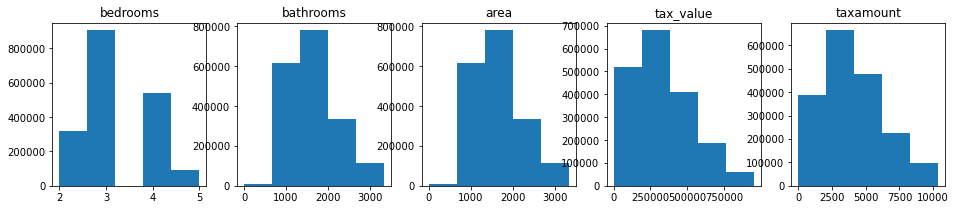

In [97]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

In [98]:
# takeaways
#bedroms & bathrooms are not distributed
#area, tax value & taxamount are skewed although close to a normal distribution

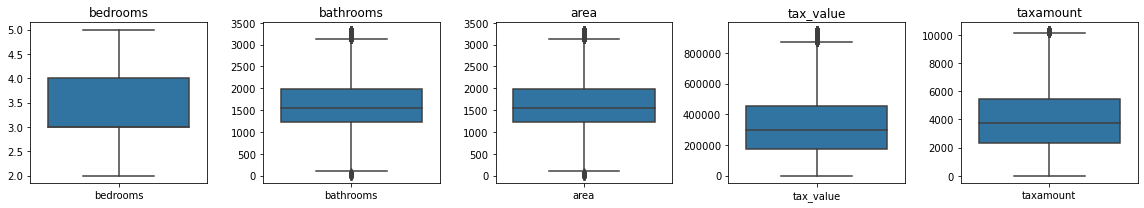

In [100]:
# List of columns
cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

plt.figure(figsize=(16, 3))

for i, col in enumerate(cols):

    # i starts at 0, but plot should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)

    # sets proper spacing between plots
    plt.tight_layout()
    
plt.show()

In [101]:
#takeaways
# a few outliers but no need to remove them

### Look for null values

In [103]:
#total row nulls 
df.isnull().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [104]:
#impute year built
df.year_built.value_counts()

1955    80481
1950    66907
1954    65544
1953    58750
1956    58085
        ...  
1801        1
1807        1
1862        1
1877        1
1874        1
Name: year_built, Length: 152, dtype: int64

In [105]:
df.year_built.describe().apply(lambda x: format(x, 'f'))

count    1853694.000000
mean        1959.432454
std           20.545268
min         1801.000000
25%         1949.000000
50%         1957.000000
75%         1972.000000
max         2016.000000
Name: year_built, dtype: object

In [106]:
#takeaways
#null values have been removed when we dropped outliers

### remove outliers to clean up nulls

In [107]:
# Set our null threshold. Any columns that have this ratio or higher will be removed
missing_perc_thresh = 0.98

# Create empty list to keep track of which columns we plan on dropping
exclude_missing = []

# Find columns that have a greater null percentage than our threshold
num_rows = df.shape[0]
for c in df.columns:
    num_missing = df[c].isnull().sum()
    if num_missing == 0:
        continue
    missing_frac = num_missing / float(num_rows)
    if missing_frac > missing_perc_thresh:
        exclude_missing.append(c)
print("We exclude: %s" % exclude_missing)

# Drop these columns from our dataset
df.drop(columns=exclude_missing, inplace=True)

We exclude: []


In [108]:
#check if data collumn is corrects
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853694 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype
---  ------      -----
 0   bedrooms    int64
 1   bathrooms   int64
 2   area        int64
 3   tax_value   int64
 4   year_built  int64
 5   taxamount   int64
 6   fips        int64
dtypes: int64(7)
memory usage: 113.1 MB


In [109]:
# get value counts to decide on data types
cols = df.columns

for col in cols:
    
    print(col.upper())
    print(df[col].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

BEDROOMS
3    904635
4    538926
2    320564
5     89569
Name: bedrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~

BATHROOMS
1200    5094
1080    4315
1120    4288
1400    3776
1440    3617
        ... 
326        1
455        1
511        1
132        1
507        1
Name: bathrooms, Length: 2955, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~

AREA
1200    5094
1080    4315
1120    4288
1400    3776
1440    3617
        ... 
326        1
455        1
511        1
132        1
507        1
Name: area, Length: 2955, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~

TAX_VALUE
450000    808
500000    751
400000    702
430000    677
440000    671
         ... 
435305      1
223693      1
492881      1
279712      1
536061      1
Name: tax_value, Length: 457240, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~

YEAR_BUILT
1955    80481
1950    66907
1954    65544
1953    58750
1956    58085
        ...  
1801        1
1807        1
1862        1
1877        1
1874        1
Name: year_built, Length: 152, dtype: int64
~~~~~~~

In [110]:
#cast flips & year built as objects & leave the rest as floats
df.fips = df.fips.astype(object)
df.year_built = df.year_built.astype(object)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853694 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   bedrooms    int64 
 1   bathrooms   int64 
 2   area        int64 
 3   tax_value   int64 
 4   year_built  object
 5   taxamount   int64 
 6   fips        object
dtypes: int64(5), object(2)
memory usage: 113.1+ MB


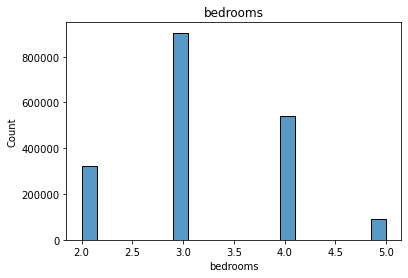

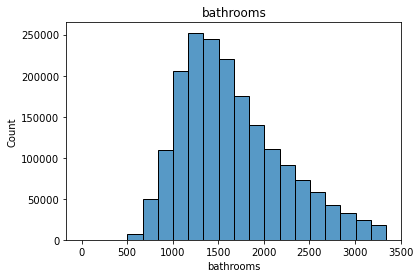

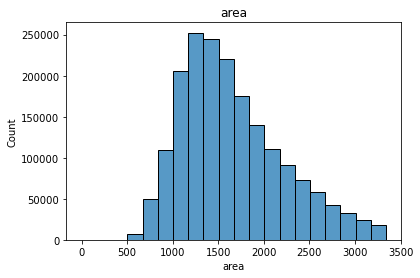

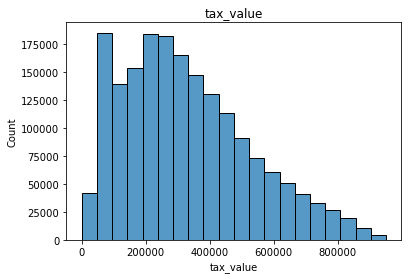

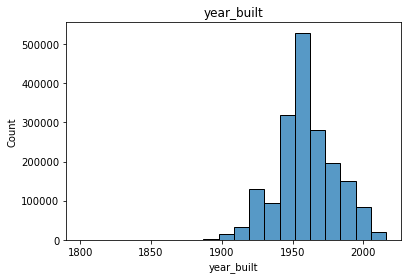

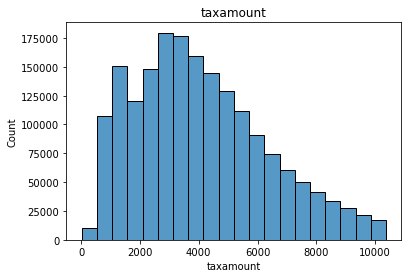

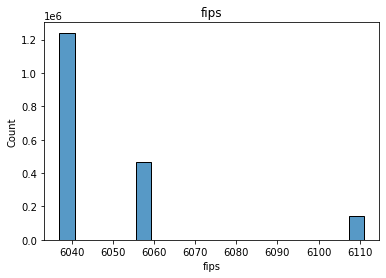

In [118]:
#plot histoplot to see distribution of data
for i in df.columns:
    sns.histplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

In [ ]:
#takeaways
# no outliers as graphs are close to normal didtribution
# no severe skews, skewed to the right